Firstly we import all the packages required such as pandas, seaborn and matplot.pyplot

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Now we label the data with the help of header. We provide the url from where we use the data from. Then we use DataFrames to read the data from the url

In [2]:
header = ["variance", "skew", "curtsies", "entropy", "classes"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, names=header)

We use info() method to show us the type of data and number of non-null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skew      1372 non-null   float64
 2   curtsies  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   classes   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


sum() method is used to add all the values for that variable

In [4]:
df.sum()

variance     595.084773
skew        2637.468482
curtsies    1917.544405
entropy    -1634.952745
classes      610.000000
dtype: float64

sum() method  with axis is used to add all the values in column way.

In [5]:
df.sum(axis=1)

0       9.03341
1       8.79260
2       3.25835
3       5.37380
4      -0.54296
         ...   
1367    0.74575
1368    1.55319
1369   -1.39280
1370    0.16430
1371    1.67946
Length: 1372, dtype: float64

median() method is used to find the midddle value for that variable.

In [6]:
df.median()

variance    0.49618
skew        2.31965
curtsies    0.61663
entropy    -0.58665
classes     0.00000
dtype: float64

In [10]:
df.var()

variance     8.081299
skew        34.445710
curtsies    18.576359
entropy      4.414256
classes      0.247112
dtype: float64

With the help of describe(), it gives the descriptive analysis of the data according to the variables.

In [12]:
df.describe()

,variance,skew,curtsies,entropy,classes
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


isnull() is used to find the null values in the data and when it is added with sum() it provided to number of null values for all the variables

In [13]:
df.isnull().sum()

variance    0
skew        0
curtsies    0
entropy     0
classes     0
dtype: int64

Here we use Seaborn package with the help of pairplot to provide a relationship between the data and also uses hue to specify which column to use to display the visualization

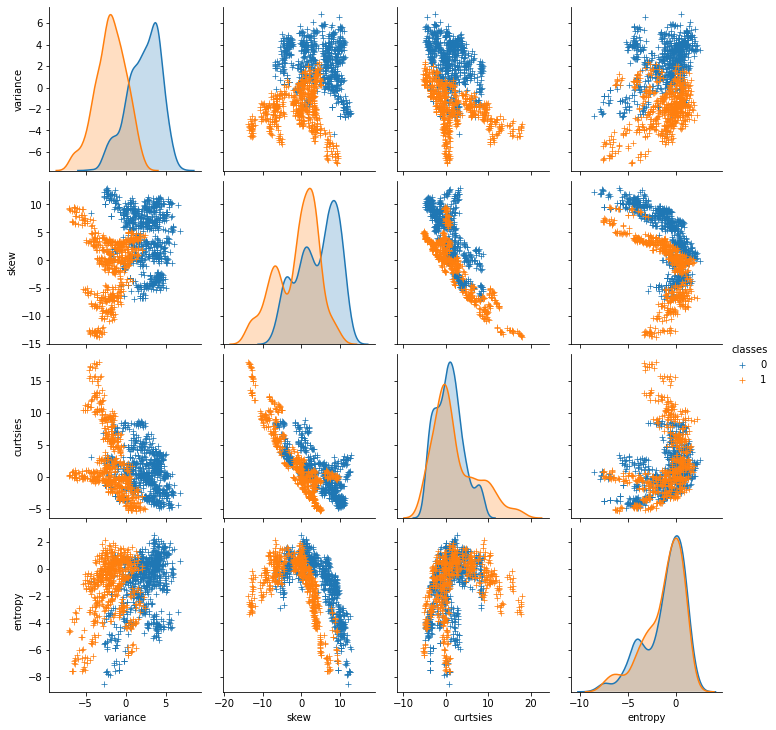

In [22]:
g = sns.pairplot(df, hue='classes', markers='+')
plt.show()

We provide Integer parameter to the data frame with the classes column and labelled as X and y

In [33]:
X = df.drop(['classes'], axis=1)
y = df['classes']

With scikit-learn we provide model selection to differntiate into test and train subsets with train_test_split
Then we add the Integer parameter X and y to train and test subset

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

We import Perceptron so it takes the input data to determine if the data trained is accurate or not

In [27]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

predict is used to label the data set

In [28]:
y_pred = ppn.predict(X_test)

In [29]:
y_test

126     0
7       0
1082    1
188     0
719     0
       ..
1150    1
876     1
642     0
348     0
297     0
Name: classes, Length: 549, dtype: int64

we import metrics from sklearn to use the accuracy_score of the labelled data

In [30]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9817850637522769

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)) 

0.9817850637522769
